## Overview

The purpose of this analysis is to understand which classification technique produces the best results on the email spam dataset - (http://archive.ics.uci.edu/ml/datasets/Spambase). We will use several machine learning algorithms to achieve two main objectives - 

- Lowest Misclassification Cost
- Highest Accuracy

### Important Packages

We will be using the scikit-learn package in python to train models for our prediction problem. We will also use matplotlib to visualize our results.

In [2]:
%matplotlib inline
from sklearn import tree, linear_model, neighbors, svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

### Reading in required files

We will be using the Spambase dataset provided by the UCI Machine learning Repository to test our algorithms.

In [3]:
data = pd.read_csv("data_hw3.csv")
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Split into train, test and validation

To avoid overfitting, we will split our data into 2 parts - train and test.

We will use the validation set to select the best model from all the different hyperparameters and then finally compare the results of all the different models on the testing dataset to decide which model works the best.

The split that I have chosen - 

- Train = 70% 
- Test = 30%

In [5]:
# Split into training, validation and testing set
#Train, test, validation split
random.seed(456)

X = data.iloc[:,:57]
y = data['spam']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                  train_size=0.7, 
                                                  stratify = y)

## Model Selection

We will use nested cross-validation to select the best model out of the all choices we have.

We follow the steps below for each model - 

1. We select the list of parameters we want to optimize over for each model and put it into a dictionary 
2. Set up the inner cross-validation object by using this parameter grid
3. Set up the outer cross-validation object.
5. Create a grid search object using the inner cv object. This will be used to find the best parameter for each outer fold.
4. Get the cross validation score using the grid search object as the estimator and the outer_cv as the cross validation parameter


In [6]:
### Create model objects

weights = {0:10,1:1}

knn = make_pipeline(MinMaxScaler(), 
                    neighbors.KNeighborsClassifier())
dt = tree.DecisionTreeClassifier()
logit = make_pipeline(MinMaxScaler(), 
                      linear_model.LogisticRegression(max_iter = 10000, solver = 'saga'))
svm_classifier = make_pipeline(MinMaxScaler(), svm.SVC())
nb_classifier = MultinomialNB()
rf_classifier = make_pipeline(MinMaxScaler(), RandomForestClassifier(class_weight = weights))
gm_classifier = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
xgb_classifier = make_pipeline(StandardScaler(), XGBClassifier(verbosity = 0))

###### Create Parameter List

## KNN
k_range = list(range(1,10))
knn_params = dict(kneighborsclassifier__n_neighbors = k_range, 
                  kneighborsclassifier__weights = ['uniform','distance'], 
                  kneighborsclassifier__p = [1,2,3])

## Decision Tree
depth_range = list(range(1,10))
min_samples_range = list(range(2,10))
impurity_decrease_range = list(np.linspace(0.1,0.5,5))

dt_params = dict(criterion = ['gini','entropy'], 
                 splitter = ['best','random'],
                 max_depth = depth_range, 
                 max_features = ['auto','sqrt','log2',None], #
                 random_state = [456],
                 min_impurity_decrease = impurity_decrease_range,
                 class_weight = [weights])

## Logistic Regression

c_range = [0.1, 1, 10]
l1r_range = [0,0.5,1]

logit_params = dict(logisticregression__penalty = ['elasticnet'],
                    logisticregression__random_state = [456],
                    logisticregression__C = c_range,
                    logisticregression__class_weight = [weights],
                    logisticregression__l1_ratio = l1r_range)

## Support Vector Machine

svm_params = {"svc__C": c_range,
              "svc__gamma": [0.1, 1, 10],
              "svc__degree": list(range(1,5)),
              "svc__kernel": ['rbf'],
              "svc__class_weight" : [weights],
              "svc__break_ties" : [False],
              "svc__random_state" : [456]
            }

## Naive Bayes

nb_params = dict(alpha = list(np.linspace(0,1,11)),fit_prior = [True,False])

## Random Forest Params

rf_params = {
    "randomforestclassifier__n_estimators": [100,200,500],
    "randomforestclassifier__max_depth": list(range(5,10)),
    "randomforestclassifier__bootstrap": [True,False]}


## Gradient Boosting Params

gb_params = {
    "gradientboostingclassifier__n_estimators": [100,500,1000,2000],
    "gradientboostingclassifier__learning_rate": [0.001,0.01,0.1],
    "gradientboostingclassifier__loss": ['deviance','exponential']}

## XGBoost params

xgb_params = {
    "xgbclassifier__n_estimators": [100,200,500],
    "xgbclassifier__max_depth": depth_range,
    "xgbclassifier__learning_rate": [0.01,0.1]}


### Misclassification cost

To calculate the misclassification cost, we define a function that weighs false positives and false negatives in the ratio 10:1. False positives are equivalent to classifying a non-spam email as spam. This could be extremely costly because an important email could be classified as spam and would never reach the user. 

In [7]:
#https://stackoverflow.com/questions/54067683/custom-scoring-function-in-sklearn-cross-validate

def misclass_cost(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred)
    cost = (10*conf[0,1] + conf[1,0])/np.sum(conf)
    return cost

### Models Used

We test 8 different models in the NestedCV process to see which model works on our data really well. The models we test are as follows - 

1. K-Nearest Neighbours
2. Decision Trees
3. Logistic Regression
4. Support Vector Machine 
5. Naive Bayes
6. Gradient Boosting
7. Random Forest
8. XGBoost
9. Neural Network

The scoring metric used will be the average misclassification cost.

In [7]:
##### Set up inner and outerCV loops

inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 456)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 456)


### Create Grid Search estimators

knn_gs = GridSearchCV(estimator = knn, param_grid = knn_params, 
                      scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False),
                      cv = inner_cv)
dt_gs = GridSearchCV(estimator = dt, param_grid = dt_params, 
                     scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False),
                     cv = inner_cv)
logit_gs = GridSearchCV(estimator = logit, param_grid = logit_params, 
                        scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False), cv = inner_cv)
svm_gs = GridSearchCV(estimator = svm_classifier, param_grid = svm_params, 
                      scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False),
                      cv = inner_cv)
nb_gs = GridSearchCV(estimator = nb_classifier, param_grid = nb_params, 
                     scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False) ,
                     cv = inner_cv)
rf_gs = GridSearchCV(estimator = rf_classifier, param_grid = rf_params, 
                     scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False),
                     cv = inner_cv)
gbm_gs = GridSearchCV(estimator = gm_classifier, param_grid = gb_params, 
                     scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False),
                      cv = inner_cv)
xgb_gs = GridSearchCV(estimator = xgb_classifier, param_grid = xgb_params, 
                     scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False),
                      cv = inner_cv)

### performing Nested cross validation using the inner and outer loops
dt_score = cross_val_score(estimator = dt_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
knn_score = cross_val_score(estimator = knn_gs, X = X_train, y = y_train, 
                            cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
logit_score = cross_val_score(estimator = logit_gs, X = X_train, y = y_train, 
                              cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
svm_score = cross_val_score(estimator = svm_gs, X = X_train, y = y_train, 
                            cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
nb_score = cross_val_score(estimator = nb_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
rf_score = cross_val_score(estimator = rf_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
gbm_score = cross_val_score(estimator = gbm_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
xgb_score = cross_val_score(estimator = xgb_gs, X = X_train, y = y_train, 
                            cv = outer_cv, 
                            scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))

### Results on misclassification cost

It looks like the random forests algorithm does the best on our training data with an average misclassification cost of 0.19. We will use this model to fit our data. The model performances are listed below - 

1. K-Nearest Neighbours - 0.3
2. Decision Trees - 0.39
3. Logistic Regression - 0.36
4. Support Vector Machine - 0.22
5. Naive Bayes - 1.08
6. Gradient Boosting - 0.25
7. Random Forest - 0.19
8. XGBoost 0.25
9. Neural Network - 0.21

In [8]:
print("knn = " + str(np.round(knn_score.mean(),2)) + " " + u"\u00B1" + " " 
      + str(np.round(knn_score.std(),2)))
print("dt = " + str(np.round(dt_score.mean(),2)) + " " + u"\u00B1" + " " 
      + str(np.round(dt_score.std(),2)))
print("logit = " + str(np.round(logit_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(logit_score.std(),2)))
print("svm = " + str(np.round(svm_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(svm_score.std(),2)))
print("nb = " + str(np.round(nb_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(nb_score.std(),2)))
print("rf = " + str(np.round(rf_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(rf_score.std(),2)))
print("gbm = " + str(np.round(gbm_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(gbm_score.std(),2)))
print("xgboost = " + str(np.round(xgb_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(xgb_score.std(),2)))

knn = -0.3 ± 0.05
dt = -0.39 ± 0.01
logit = -0.36 ± 0.07
svm = -0.22 ± 0.04
nb = -1.08 ± 0.19
rf = -0.19 ± 0.04
gbm = -0.25 ± 0.04
xgboost = -0.27 ± 0.05


In [45]:
## Creating a neural network

def create_model(activation='relu', nb_hidden=10, nb_hidden_2 = 10, nb_hidden_3 = 10):
    model = Sequential()
    model.add(Dense(nb_hidden, input_dim=57, activation=activation))
    model.add(Dense(nb_hidden_2, activation=activation))
    model.add(Dense(nb_hidden_3, activation=activation))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## https://stackoverflow.com/questions/44132652/keras-how-to-perform-a-prediction-using-kerasregressor

activations = ['relu', 'tanh', 'sigmoid']
nb_hiddens = np.array([25, 50])
nb_hiddens_2 = np.array([10,20])
nb_hiddens_3 = np.array([5,10])

param_grid = dict(kerasclassifier__activation=activations,
                  kerasclassifier__nb_hidden=nb_hiddens, 
                  kerasclassifier__nb_hidden_2 = nb_hiddens_2, 
                  kerasclassifier__nb_hidden_3 = nb_hiddens_3)
model = make_pipeline(StandardScaler(),
                      KerasClassifier(build_fn=create_model, 
                                      epochs=100, 
                                      batch_size=256, 
                                      verbose=0,
                                      class_weight = weights))

nn_gs = GridSearchCV(estimator=model, param_grid=param_grid,
                  cv= inner_cv, scoring=make_scorer(misclass_cost, 
                                                  greater_is_better=False))

nn_score = cross_val_score(estimator = nn_gs, X = X_train, y = y_train, cv = outer_cv,
                           scoring = make_scorer(misclass_cost, 
                                                  greater_is_better=False))
print("nn = " + str(np.round(nn_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(nn_score.std(),2)))

nn = -0.21 ± 0.08


## Re-training and evaluation

Now we re-train our Random Forest model on the entire training dataset and evaluate it on the testing set. 

Looking at the classification report below, here are some observations - 

1. The overall accuracy and f1-score is 0.87, which shows that our model performs generalizes reasonably well on the testing dataset.
2. The misclassification cost is 0.15 which is even lower than what we observed on the training dataset which is also a good sign. 
3. The precision of class 1 (spam) and recall of class 0 (non-spam) are both high showing that the model is trying to maximize the misclassifcation cost and it takes into account that classifying a non-spam as spam is much worse than the reverse. 


In [10]:
## Best model selected is the Random Forest

final_model = rf_gs.fit(X_train,y_train)

y_pred = final_model.predict(X_test)
final_model.best_params_ 

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       837
           1       0.99      0.69      0.81       544

    accuracy                           0.87      1381
   macro avg       0.91      0.84      0.86      1381
weighted avg       0.89      0.87      0.87      1381



In [12]:
print(confusion_matrix(y_test,y_pred))
print("Missclassification cost = " + str(np.round(misclass_cost(y_test,y_pred),2)))

[[833   4]
 [170 374]]
Missclassification cost = 0.15


## Visualizing the ROC and lift curves

The report above uses the threshold of 0.5 to choose between Spam and Not-Spam. 

Looking at the charts below, we can see that our model performs really well with an AUC of 0.97 which as close to perfect as it can get. 

The lift chart also shows that for up-to 35% of the sample the model predicts 2.5 times better than a random guess.


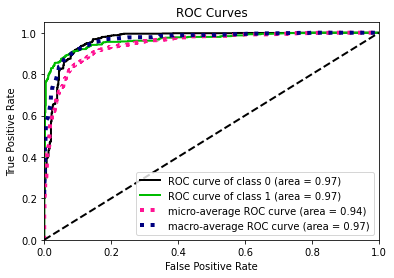

In [39]:
## PLotting ROC and lift curves

from scikitplot.metrics import plot_roc, plot_lift_curve, roc_curve

proba = final_model.predict_proba(X_test)

thres = pd.DataFrame({'Actual':y_test, 'Predicted':proba[:,1]})

plot_roc(y_test, proba)
plt.show()

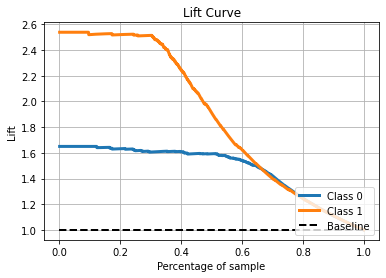

In [41]:
plot_lift_curve(y_test, proba)
plt.show()

## Model focus shifts to f-1 score

We repeat the NestedCV process to get the model that gives the best f-1 score among the 9 different models.

In [46]:

knn = make_pipeline(MinMaxScaler(), 
                    neighbors.KNeighborsClassifier())
dt = tree.DecisionTreeClassifier()
logit = make_pipeline(MinMaxScaler(), 
                      linear_model.LogisticRegression(max_iter = 10000, solver = 'saga'))
svm_classifier = make_pipeline(MinMaxScaler(), svm.SVC())
nb_classifier = MultinomialNB()
rf_classifier = make_pipeline(MinMaxScaler(), RandomForestClassifier(class_weight = 'balanced'))
gm_classifier = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
xgb_classifier = make_pipeline(StandardScaler(), XGBClassifier(verbosity = 0))
model = make_pipeline(StandardScaler(),
                      KerasClassifier(build_fn=create_model, 
                                      epochs=100, 
                                      batch_size=256, 
                                      verbose=0))
###### Create Parameter List

## KNN
k_range = list(range(1,10))
knn_params = dict(kneighborsclassifier__n_neighbors = k_range, 
                  kneighborsclassifier__weights = ['uniform','distance'], 
                  kneighborsclassifier__p = [1,2,3])

## Decision Tree
depth_range = list(range(1,10))
min_samples_range = list(range(2,10))
impurity_decrease_range = list(np.linspace(0.1,0.5,5))

dt_params = dict(criterion = ['gini','entropy'], 
                 splitter = ['best','random'],
                 max_depth = depth_range, 
                 max_features = ['auto','sqrt','log2',None], #
                 random_state = [456],
                 min_impurity_decrease = impurity_decrease_range,
                 class_weight = ['balanced'])

## Logistic Regression

c_range = [0.1, 1, 10]
l1r_range = [0,0.5,1]

logit_params = dict(logisticregression__penalty = ['elasticnet'],
                    logisticregression__random_state = [456],
                    logisticregression__C = c_range,
                    logisticregression__class_weight = ['balanced', None],
                    logisticregression__l1_ratio = l1r_range)

## Support Vector Machine

svm_params = {"svc__C": c_range,
              "svc__gamma": [0.1, 1, 10],
              "svc__degree": list(range(1,5)),
              "svc__kernel": ['rbf'],
              "svc__class_weight" : ['balanced'],
              "svc__break_ties" : [False],
              "svc__random_state" : [456]
            }

## Naive Bayes

nb_params = dict(alpha = list(np.linspace(0,1,11)),fit_prior = [True,False])

## Random Forest Params

rf_params = {
    "randomforestclassifier__n_estimators": [100,200,500],
    "randomforestclassifier__max_depth": list(range(5,10)),
    "randomforestclassifier__bootstrap": [True,False]}


## Gradient Boosting Params

gb_params = {
    "gradientboostingclassifier__n_estimators": [100,500,1000,2000],
    "gradientboostingclassifier__learning_rate": [0.001,0.01,0.1],
    "gradientboostingclassifier__loss": ['deviance','exponential']}

## XGBoost params

xgb_params = {
    "xgbclassifier__n_estimators": [100,200,500],
    "xgbclassifier__max_depth": depth_range,
    "xgbclassifier__learning_rate": [0.01,0.1]}




##### Set up inner and outerCV loops

inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 456)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 456)

scoring = 'f1_weighted'

### Create Grid Search estimators

knn_gs = GridSearchCV(estimator = knn, param_grid = knn_params, 
                      scoring = scoring,
                      cv = inner_cv)
dt_gs = GridSearchCV(estimator = dt, param_grid = dt_params, 
                     scoring =scoring,
                     cv = inner_cv)
logit_gs = GridSearchCV(estimator = logit, param_grid = logit_params, 
                        scoring = scoring)
svm_gs = GridSearchCV(estimator = svm_classifier, param_grid = svm_params, 
                      scoring = scoring,
                      cv = inner_cv)
nb_gs = GridSearchCV(estimator = nb_classifier, param_grid = nb_params, 
                     scoring = scoring ,
                     cv = inner_cv)
rf_gs = GridSearchCV(estimator = rf_classifier, param_grid = rf_params, 
                     scoring = scoring,
                     cv = inner_cv)
gbm_gs = GridSearchCV(estimator = gm_classifier, param_grid = gb_params, 
                     scoring = scoring,
                      cv = inner_cv)
xgb_gs = GridSearchCV(estimator = xgb_classifier, param_grid = xgb_params, 
                     scoring = scoring,
                      cv = inner_cv)
nn_gs = GridSearchCV(estimator=model, param_grid=param_grid,
                  cv= inner_cv, scoring=scoring)

### performing Nested cross validation using the inner and outer loops
dt_score = cross_val_score(estimator = dt_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = scoring)
knn_score = cross_val_score(estimator = knn_gs, X = X_train, y = y_train, 
                            cv = outer_cv, scoring = scoring)
logit_score = cross_val_score(estimator = logit_gs, X = X_train, y = y_train, 
                              cv = outer_cv, scoring = scoring)
svm_score = cross_val_score(estimator = svm_gs, X = X_train, y = y_train, 
                            cv = outer_cv, scoring = scoring)
nb_score = cross_val_score(estimator = nb_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = scoring)
rf_score = cross_val_score(estimator = rf_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = scoring)
gbm_score = cross_val_score(estimator = gbm_gs, X = X_train, y = y_train, 
                           cv = outer_cv, scoring = scoring)
xgb_score = cross_val_score(estimator = xgb_gs, X = X_train, y = y_train, 
                            cv = outer_cv, 
                            scoring = scoring)
nn_score = cross_val_score(estimator = nn_gs, X = X_train, y = y_train, 
                           cv = outer_cv,
                           scoring = scoring)

### Results based on f-1 score

It looks like the XGBoost does the best on our training data with an f-1 score of 0.19. We will use this model to fit our data. The model performances are listed below - 

1. K-Nearest Neighbours = 0.91 ± 0.01
2. Decision Trees = 0.79 ± 0.02
3. Logistic Regression = 0.93 ± 0.01
4. Support Vector Machine = 0.93 ± 0.0
5. Naive Bayes = 0.79 ± 0.02
6. Random Forest = 0.94 ± 0.01
7. Gradient Boosted Trees = 0.95 ± 0.01
8. XGboost = 0.95 ± 0.01
9. Neural Networks = 0.94 ± 0.01

In [47]:
print("knn = " + str(np.round(knn_score.mean(),2)) + " " + u"\u00B1" + " " 
      + str(np.round(knn_score.std(),2)))
print("dt = " + str(np.round(dt_score.mean(),2)) + " " + u"\u00B1" + " " 
      + str(np.round(dt_score.std(),2)))
print("logit = " + str(np.round(logit_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(logit_score.std(),2)))
print("svm = " + str(np.round(svm_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(svm_score.std(),2)))
print("nb = " + str(np.round(nb_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(nb_score.std(),2)))
print("rf = " + str(np.round(rf_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(rf_score.std(),2)))
print("gbm = " + str(np.round(gbm_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(gbm_score.std(),2)))
print("xgboost = " + str(np.round(xgb_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(xgb_score.std(),2)))
print("nn = " + str(np.round(nn_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(nn_score.std(),2)))

knn = 0.91 ± 0.01
dt = 0.79 ± 0.02
logit = 0.93 ± 0.01
svm = 0.93 ± 0.0
nb = 0.79 ± 0.02
rf = 0.94 ± 0.01
gbm = 0.95 ± 0.01
xgboost = 0.95 ± 0.01
nn = 0.94 ± 0.01


## Re-training and evaluation

Now we re-train our XGBoost model on the entire training dataset and evaluate it on the testing set. 

Looking at the classification report below, here are some observations - 

1. The overall accuracy and f1-score is 0.95, which shows that our model performs generalizes reasonably well on the testing dataset.
2. The misclassification cost is 0.20 which is much higher than what we observed in the previous models where we wanted to minimize misclassification cost. 


In [49]:
final_model_1 = xgb_gs.fit(X_train,y_train)

y_pred = final_model_1.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       837
           1       0.96      0.92      0.94       544

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



In [53]:
print(confusion_matrix(y_test,y_pred))
print("Missclassification cost = " + str(np.round(misclass_cost(y_test,y_pred),2)))

[[814  23]
 [ 41 503]]
Missclassification cost = 0.2


## Visualizing the ROC and lift curves

The report above uses the threshold of 0.5 to choose between Spam and Not-Spam. 

Looking at the charts below, we can see that our model performs really well with an AUC of 0.99 which as close to perfect as it can get. This is also significantly higher than the previous model, which had an AUC of 0.97. This shows that our model has been trained on the correct objective of maximizing the f-1 score.

The lift chart also shows that for up-to 40% of the sample the model predicts 2.5 times better than a random guess.


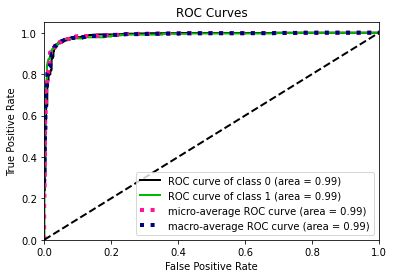

In [51]:
## PLotting ROC and lift curves

from scikitplot.metrics import plot_roc, plot_lift_curve, roc_curve

proba = final_model_1.predict_proba(X_test)

thres = pd.DataFrame({'Actual':y_test, 'Predicted':proba[:,1]})

plot_roc(y_test, proba)
plt.show()

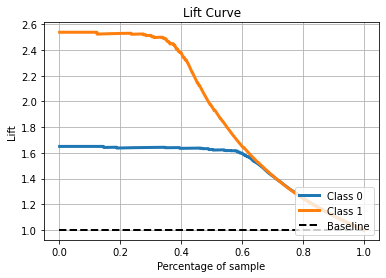

In [52]:
plot_lift_curve(y_test, proba)
plt.show()